In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans

In [3]:
age=[27,27,27,27,27,27]
height=[165,170,155,175,187,171]
weight=[85,91,78,66,101,74]

In [10]:
df=pd.DataFrame(age)
df['height']=height
df['weight']=weight
df.columns=['Age','Height','Weight']
df

,Age,Height,Weight
0,27,165,85
1,27,170,91
2,27,155,78
3,27,175,66
4,27,187,101
5,27,171,74


In [13]:
kmeans=KMeans(n_clusters=2,max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
df['Labels_1']=kmeans.labels_
df

,Age,Height,Weight,Labels_1
0,27,165,85,0
1,27,170,91,1
2,27,155,78,0
3,27,175,66,0
4,27,187,101,1
5,27,171,74,0


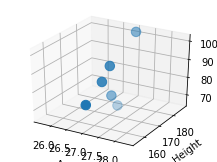

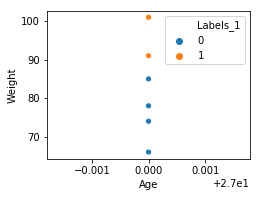

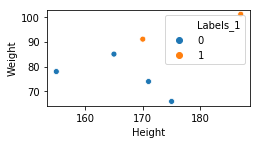

In [54]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(221,projection='3d')
xs=df['Age']
ys=df['Height']
zs=df['Weight']
ax.scatter(xs,ys,zs,s=90)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
plt.show()

fig=plt.figure(figsize=(8,6))
plt.subplot(222)
sns.scatterplot(x='Age',y='Weight',data=df,hue='Labels_1')

plt.show()

fig=plt.figure(figsize=(8,6))
plt.subplot(322)
sns.scatterplot(x='Height',y='Weight',data=df,hue='Labels_1')

plt.show()

# Let's remove Age:


In [51]:
df_final=df.drop(['Age','Labels_1'],1)
df_final.head()

,Height,Weight
0,165,85
1,170,91
2,155,78
3,175,66
4,187,101


In [52]:
kmeans_2=KMeans(n_clusters=2,max_iter=50)
kmeans_2.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
df['Labels_2']=kmeans_2.labels_
df.head()

,Age,Height,Weight,Labels_1,Labels_2
0,27,165,85,0,1
1,27,170,91,1,0
2,27,155,78,0,1
3,27,175,66,0,1
4,27,187,101,1,0


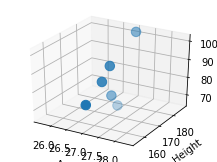

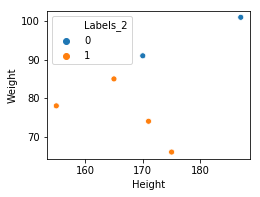

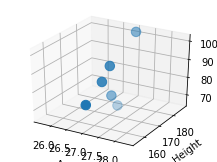

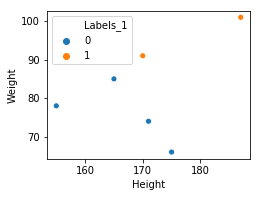

In [63]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(221,projection='3d')
xs=df['Age']
ys=df['Height']
zs=df['Weight']
ax.scatter(xs,ys,zs,s=90)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
plt.show()



fig=plt.figure(figsize=(8,6))
plt.subplot(222)
sns.scatterplot(x='Height',y='Weight',data=df,hue='Labels_2')

plt.show()

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(223,projection='3d')
xs=df['Age']
ys=df['Height']
zs=df['Weight']
ax.scatter(xs,ys,zs,s=90)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
plt.show()


fig=plt.figure(figsize=(8,6))
plt.subplot(224)
sns.scatterplot(x='Height',y='Weight',data=df,hue='Labels_1')

plt.show()

In [64]:
# The above graph shows that,
# 1. By removing column with least variance we do not loose the cluster composition.